In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [47]:

# # fix_yahoo_finance is used to fetch data 
# import yfinance as yf
# yf.pdr_override()


# # input
# symbol = 'RELIANCE.NS'
# start = '2017-01-01'
# end = '2018-01-01'


# # dataframe
# dataset = yf.download(symbol,start,end)



# # View the last 5 rows
# print('Last 5 Rows')
# print(df.tail())

#Read input file
raw_data = pd.read_csv("C:\\Users\\tcgra\\Documents\\LJMU_Code\Datasets\\reliance_stock.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3698 non-null   object 
 1   Open       3698 non-null   float64
 2   High       3698 non-null   float64
 3   Low        3698 non-null   float64
 4   Close      3698 non-null   float64
 5   Adj Close  3698 non-null   float64
 6   Volume     3698 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.4+ KB


In [48]:
#convert Date obj to Date type
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3698 non-null   datetime64[ns]
 1   Open       3698 non-null   float64       
 2   High       3698 non-null   float64       
 3   Low        3698 non-null   float64       
 4   Close      3698 non-null   float64       
 5   Adj Close  3698 non-null   float64       
 6   Volume     3698 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 202.4 KB


In [49]:
raw_data = raw_data.set_index(['Date'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3698 entries, 2004-01-01 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3698 non-null   float64
 1   High       3698 non-null   float64
 2   Low        3698 non-null   float64
 3   Close      3698 non-null   float64
 4   Adj Close  3698 non-null   float64
 5   Volume     3698 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.2 KB


In [50]:
df = raw_data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3698 entries, 2004-01-01 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3698 non-null   float64
 1   High       3698 non-null   float64
 2   Low        3698 non-null   float64
 3   Close      3698 non-null   float64
 4   Adj Close  3698 non-null   float64
 5   Volume     3698 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.2 KB


In [51]:
stock_daily_returns = df['Adj Close'].pct_change()
stock_monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()
stock_yearly_returns = df['Adj Close'].resample('Y').ffill().pct_change()

In [52]:
# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(stock_monthly_returns)
# ax1.set_xlabel("Date")
# ax1.set_ylabel("Percent")
# ax1.set_title("Infosys Stock monthly returns data")
# plt.show()

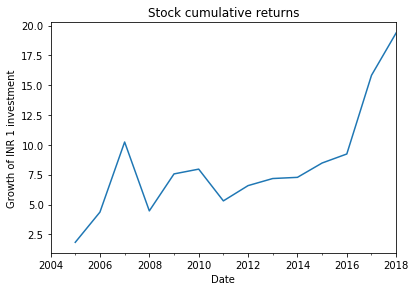

In [53]:
stock_cum_returns = (stock_yearly_returns + 1).cumprod()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
stock_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of INR 1 investment")
ax1.set_title("Stock cumulative returns")
plt.show()

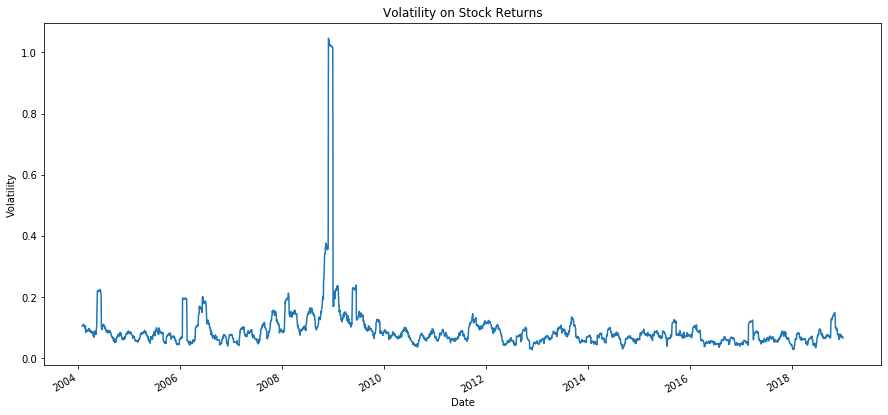

In [56]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 21 #252 #21
returns = np.log(df['Close']/df['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Volatility on Stock Returns')
plt.show()

In [55]:

# plt.figure(figsize=(16,8))
# plt.plot(df['Adj Close'])
# plt.title('Infosys Closing Price Chart')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

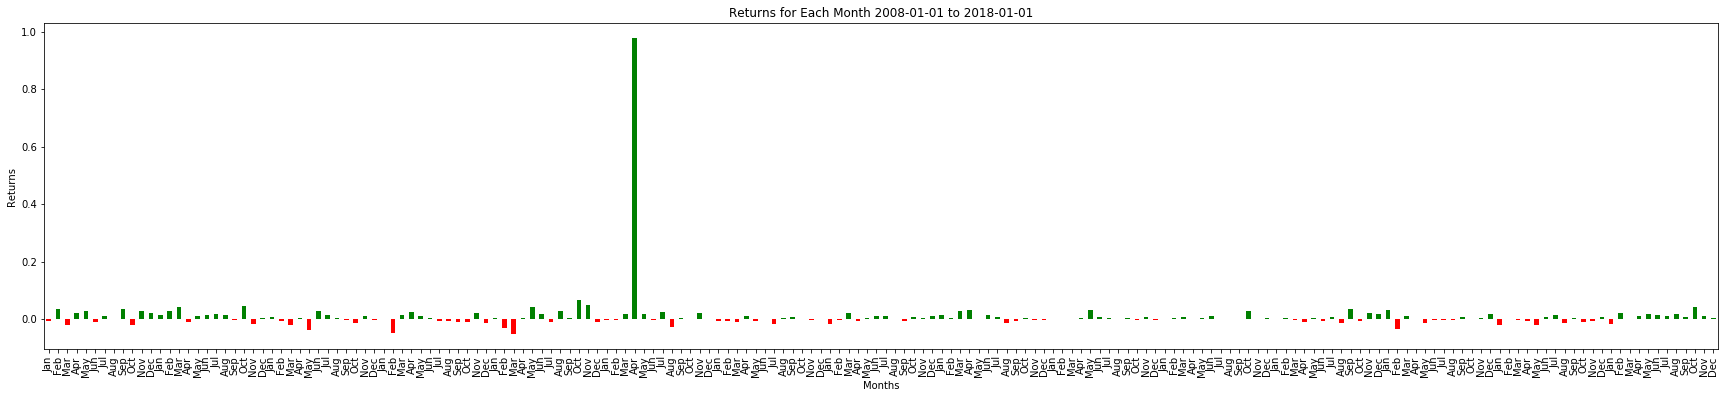

In [37]:


from matplotlib import dates as mdates
import datetime as dt
import calendar
import datetime


start = '2008-01-01'
end = '2018-01-01'

monthly = df.asfreq('BM')
monthly['Returns'] = df['Adj Close'].pct_change().dropna()
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")


monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month
monthly['Returns'].plot(kind='bar', figsize=(30,6))


monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month " + start + ' to ' + end)
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [38]:
yearly = df.asfreq('BY')
yearly['Returns'] = df['Adj Close'].pct_change().dropna()
yearly = yearly.reset_index()
yearly['Years'] = yearly['Date'].dt.year
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years
0,2004-12-31,128.750000,130.940994,127.997002,130.731003,25.412407,12498704.0,0.021264,2004
1,2005-12-30,188.125000,188.681000,185.886993,187.302994,40.629768,13610048.0,0.003144,2005
2,2006-12-29,281.500000,283.225006,278.294006,280.225006,78.989799,6093568.0,-0.002847,2006
3,2007-12-31,225.125000,225.625000,219.886993,221.238007,65.746750,5272944.0,-0.014666,2007
4,2008-12-31,141.875000,142.375000,137.886993,139.431000,50.233013,7221320.0,-0.011044,2008
5,2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
6,2010-12-31,429.125000,431.375000,425.644012,430.343994,185.534012,5859728.0,-0.001218,2010
7,2011-12-30,343.000000,346.875000,342.687988,345.955994,165.511627,5308816.0,0.009315,2011
8,2012-12-31,289.375000,290.513000,287.962006,289.837006,157.892349,3451824.0,-0.001939,2012
9,2013-12-31,437.500000,440.212006,435.031006,435.705994,274.443115,3590808.0,-0.004770,2013


NameError: name 'yearly_returns_avg' is not defined

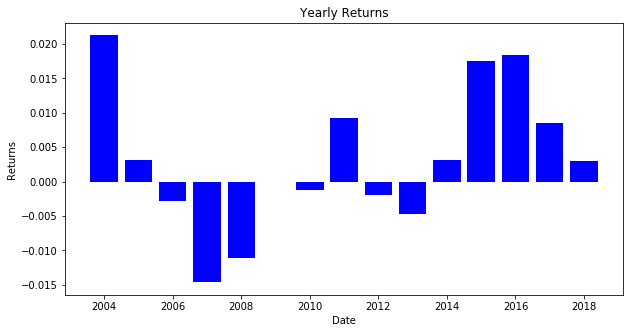

In [46]:
# yearly_returns_avg = df['Returns'].groupby([df.index.year]).mean()
# yearly_returns_avg
yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

colors = yearly.ReturnsPositive.map({True: 'b', False: 'b'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.show()


In [70]:
import seaborn as sns
sns.pairplot(returns[1:])

SyntaxError: invalid syntax (<ipython-input-70-4c062cdf9b27>, line 2)

In [77]:
returns = pd.DataFrame()
returns['Return'] = raw_data['Adj Close'].pct_change()


In [78]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3697 entries, 2004-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  3696 non-null   float64
dtypes: float64(1)
memory usage: 57.8 KB


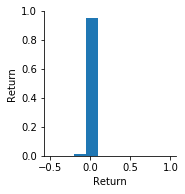

In [79]:
import seaborn as sns
sns.pairplot(returns[1:])

In [80]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

Return   2009-10-14
dtype: datetime64[ns]

In [81]:
# Best Single Day Gain

returns.idxmax()

Return   2009-10-13
dtype: datetime64[ns]

In [82]:
returns.std()

Return    0.032602
dtype: float64